## Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(-257.30798, shape=(), dtype=float32)


In [3]:
print(tf.config.list_physical_devices('CPU'))

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## Data preprocessing

### Training Image Preprocessing

In [4]:
training_set=tf.keras.utils.image_dataset_from_directory(
    "train/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 47391 files belonging to 26 classes.


## validation image processing

In [5]:
validation_set= training_set=tf.keras.utils.image_dataset_from_directory(
    "valid/valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [6]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [7]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  [[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  [[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  ...

  [[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  [[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  [[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   25

## Building Model

In [8]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [9]:
model= Sequential()

In [10]:
### Building Convulation Layer

In [11]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

In [12]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

In [13]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

In [14]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

In [15]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

In [16]:
model.add(Dropout(0.25))   #to avoid overfitting

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(units=1500,activation='relu')) ##Increase neurons

In [19]:
model.add(Dropout(0.4))

In [20]:
##output layer
model.add(Dense(units=38, activation='softmax'))

## Compiling Model

### to avoid overshooting
1. we repalace learning rate from default 0.001 to 0.0001
2. there may be chance of underfitting , so increase number of neuron
3. we add more convuation layer to extract more feature from image there may be possibility that model is confusing due to lack of feature

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## Model training ---

In [23]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)


Epoch 1/10
550/550 [==============================] - 2140s 4s/step - loss: 2.6498 - accuracy: 0.2568 - val_loss: 1.9295 - val_accuracy: 0.4361
Epoch 2/10
550/550 [==============================] - 1770s 3s/step - loss: 1.3261 - accuracy: 0.6025 - val_loss: 0.8244 - val_accuracy: 0.7460
Epoch 3/10
550/550 [==============================] - 1359s 2s/step - loss: 0.8659 - accuracy: 0.7287 - val_loss: 0.6315 - val_accuracy: 0.7989
Epoch 4/10
550/550 [==============================] - 3077s 6s/step - loss: 0.6334 - accuracy: 0.7997 - val_loss: 0.3468 - val_accuracy: 0.8869
Epoch 5/10
550/550 [==============================] - 2058s 4s/step - loss: 0.4729 - accuracy: 0.8500 - val_loss: 0.2551 - val_accuracy: 0.9187
Epoch 6/10
550/550 [==============================] - 1467s 3s/step - loss: 0.3764 - accuracy: 0.8754 - val_loss: 0.2366 - val_accuracy: 0.9248
Epoch 7/10
550/550 [==============================] - 1336s 2s/step - loss: 0.2873 - accuracy: 0.9052 - val_loss: 0.1451 - val_accuracy:

## attained validation accuracy as 98 percent

## Model Evaluation

In [24]:
### Model Evaluation on training set

In [25]:
train_loss,train_acc = model.evaluate(training_set)

550/550 [==============================] - 214s 389ms/step - loss: 0.0912 - accuracy: 0.9722


In [26]:
print(train_loss,train_acc)

0.09119941294193268 0.9721716642379761


In [27]:
##model on validation set

In [28]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 208s 379ms/step - loss: 0.0912 - accuracy: 0.9722


In [29]:
print(val_loss,val_acc)

0.0911993756890297 0.9721716642379761


## saving model

In [33]:
model.save("trained_model.h5")

In [34]:
model.save("trained_model.keras")

###model.save('your_model.h5', save_format='h5', include_optimizer=True, compression='gzip', compression_opts=9)


In [36]:
training_history.history

{'loss': [2.6497840881347656,
  1.3261082172393799,
  0.8658693432807922,
  0.6334440112113953,
  0.4729057252407074,
  0.37643831968307495,
  0.28727900981903076,
  0.23960070312023163,
  0.20458874106407166,
  0.16861781477928162],
 'accuracy': [0.25682905316352844,
  0.6025494933128357,
  0.7287161350250244,
  0.7997382283210754,
  0.8500455021858215,
  0.8754268288612366,
  0.9052469730377197,
  0.9211245179176331,
  0.9321079254150391,
  0.9446278214454651],
 'val_loss': [1.929474949836731,
  0.8243516087532043,
  0.6315358877182007,
  0.34678301215171814,
  0.25506672263145447,
  0.23656073212623596,
  0.14514881372451782,
  0.13706569373607635,
  0.08834399282932281,
  0.09119942039251328],
 'val_accuracy': [0.43614840507507324,
  0.745959460735321,
  0.7988845705986023,
  0.8869223594665527,
  0.9186774492263794,
  0.9247666597366333,
  0.9540746808052063,
  0.9557819366455078,
  0.9725130796432495,
  0.9721716642379761]}

## recording history

In [38]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy visualization

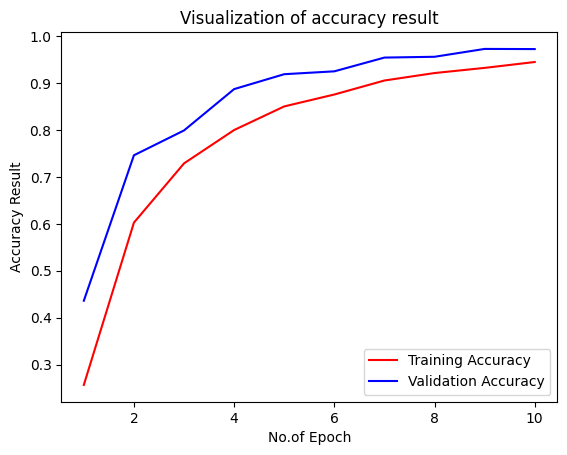

In [46]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No.of Epoch")
plt.ylabel("Accuracy Result")
plt.title("Visualization of accuracy result")
plt.legend()
plt.show()